In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)


corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
proComp <- data.frame(fread("/home/beraslan/jovian-work/analysisSingle/R/allComplexes.txt"), stringsAsFactors = F)
proComp <- proComp[proComp$Organism == "Mouse",]

In [3]:
ProteinComplexes=list()

for(i in 1:nrow(proComp)){
  ProteinComplexes <- lappend(ProteinComplexes, strsplit(as.character(proComp[i,"subunits.Gene.name."]) , ";")[[1]])
}
names(ProteinComplexes) <- proComp$ComplexName
ProteinComplexes <- ProteinComplexes[!duplicated(names(ProteinComplexes))]


In [4]:
coefsAll <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMBetaCoefsALL.csv", row.names = 1), stringsAsFactors = FALSE)
pValsAll <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_LMPValuesALL.csv", row.names = 1), stringsAsFactors = FALSE)
pValsAllAdj <- sapply(pValsAll, function(x){p.adjust(x, method = "fdr", n = length(x))})
rownames(pValsAllAdj) <- rownames(pValsAll)
coefsAll[pValsAllAdj > 0.1] = 0

In [5]:
coefsAllSign <-  read.csv("/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/ME_SignificantBetaCoefs.csv", row.names = 1)

In [6]:
coefsAll <- coefsAll[rownames(coefsAllSign),]

In [7]:
dim(coefsAll)

[1]  329 6685

In [8]:
rownames(coefsAll) <- sapply(rownames(coefsAll), function(x){strsplit(x,"_")[[1]][2]})

In [9]:
x = ProteinComplexes[["Immunoproteasome"]]

In [10]:
x

[1] "Psmb1"  "Psmb10" "Psma3"  "Psmb8"  "Psmb9"  "Psma2"  "Psmb4"  "Psma6" 
 [9] "Psma4"  "Psmb3"  "Psmb2"  "Psma1"  "Psma7"  "Psma5"

In [11]:
any(x %in% rownames(coefsAll) )

[1] FALSE

In [12]:
availProteinComplexes <- sapply(ProteinComplexes, function(x){any(x %in% rownames(coefsAll) )})

In [14]:
availProteinComplexes <- ProteinComplexes[availProteinComplexes]

In [15]:
length(availProteinComplexes)

[1] 101

In [16]:
proCompMembers <- unique(unlist(availProteinComplexes))

In [17]:
proCompMembersEffected <- proCompMembers[proCompMembers %in% colnames(coefsAll)]

In [18]:
proCompMembersKO <- proCompMembers[proCompMembers %in% rownames(coefsAll)]

In [19]:
proCompMembersKO <- proCompMembersKO[order(proCompMembersKO)]
proCompMembersKO
proCompMembersEffected <- proCompMembersEffected[order(proCompMembersEffected)]
proCompMembersEffected

[1] "Ahr"     "Akt1"    "Amfr"    "Apc"     "Arnt"    "Bid"     "Birc2"  
 [8] "Bmi1"    "Bop1"    "Cbl"     "Chd4"    "Crebbp"  "Cul1"    "Cul3"   
[15] "Cul5"    "Eed"     "Ep300"   "Gnb1"    "Grb2"    "Gsk3b"   "Hdac4"  
[22] "Ikbkg"   "Junb"    "Kctd10"  "Keap1"   "Kmt2b"   "Mtor"    "Myc"    
[29] "Nfkb1"   "Pias1"   "Pparg"   "Ppp2r2a" "Ptpn11"  "Rack1"   "Raf1"   
[36] "Rbbp4"   "Rbx1"    "Rela"    "Smad2"   "Strap"   "Taf5"    "Tceb1"  
[43] "Tceb2"   "Traf2"   "Traf6"   "Trim33"  "Ube2n"   "Vdr"     "Wdr5"

[1] "Actb"     "Actl6a"   "Ahr"      "Aip"      "Akt1"     "Amfr"    
  [7] "Apc"      "Arnt"     "Arrb2"    "Ash2l"    "Axin1"    "B9d2"    
 [13] "Bak1"     "Bcl2"     "Bcl2l1"   "Birc2"    "Birc3"    "Blnk"    
 [19] "Bmi1"     "Bop1"     "Btk"      "C1d"      "Cbl"      "Cd2ap"   
 [25] "Cd40"     "Cebpz"    "Chd4"     "Chuk"     "Clock"    "Crebbp"  
 [31] "Crkl"     "Ctnnb1"   "Cul1"     "Cul3"     "Cul5"     "Ddx18"   
 [37] "Ddx21"    "Ddx24"    "Ddx27"    "Ddx5"     "Ddx56"    "Diaph1"  
 [43] "Diaph3"   "Ebna1bp2" "Eed"      "Eef1g"    "Ep300"    "Exosc10" 
 [49] "Exosc5"   "Ezh2"     "Fbl"      "Fbxw8"    "Fn1"      "Ftsj3"   
 [55] "Gab2"     "Gatad2b"  "Gnb1"     "Gng2"     "Gngt2"    "Gnl2"    
 [61] "Grb2"     "Gsk3b"    "Gtpbp4"   "Hdac1"    "Hdac2"    "Hdac4"   
 [67] "Hmgb1"    "Hsp90aa1" "Hsp90ab1" "Ikbkb"    "Ikbkg"    "Ikzf1"   
 [73] "Ino80"    "Inpp5d"   "Insr"     "Junb"     "Kat2b"    "Kctd10"  
 [79] "Kdm1a"    "Keap1"    "Kmt2b"    "Lat2"     "Limd1"    "Map2k4"  
 [85] "Map2k7"   "Map3k1"   "Map3k5"   "Mapk1"    "Mapre1"   "Max"     
 [91] "Mbd2"     "Mbd3"     "Med4"     "Mrto4"    "Mta1"     "Mta2"    
 [97] "Mtor"     "Mybbp1a"  "Myc"      "Ncl"      "Ncoa1"    "Nfe2l2"  
[103] "Nfkb1"    "Nfkbia"   "Ngly1"    "Nifk"     "Nop2"     "Nop56"   
[109] "Nop58"    "Notch1"   "Pes1"     "Phb2"     "Pias1"    "Pik3ca"  
[115] "Pik3r1"   "Pld2"     "Pparg"    "Ppp2ca"   "Ppp2r1a"  "Ppp2r2a" 
[121] "Prkci"    "Ptpn11"   "Rack1"    "Rad23b"   "Raf1"     "Ralbp1"  
[127] "Rapgef1"  "Rbbp4"    "Rbbp7"    "Rbx1"     "Rela"     "Rpf2"    
[133] "Rpl13"    "Rpl13a"   "Rpl14"    "Rpl15"    "Rpl18"    "Rpl18a"  
[139] "Rpl19"    "Rpl21"    "Rpl26"    "Rpl3"     "Rpl4"     "Rpl5"    
[145] "Rpl6"     "Rpl7"     "Rpl7a"    "Rpl8"     "Rplp0"    "Rps3"    
[151] "Rps4x"    "Rps6"     "Rps8"     "Rrp1"     "Rrs1"     "Scrib"   
[157] "Shc1"     "Sin3a"    "Smad1"    "Smad2"    "Smad4"    "Smarca4" 
[163] "Smarcb1"  "Smarcc1"  "Smarcc2"  "Smarcd2"  "Smarce1"  "Sos1"    
[169] "Sqstm1"   "Src"      "Stat3"    "Strap"    "Sumo1"    "Suz12"   
[175] "Taf1"     "Taf10"    "Taf11"    "Taf12"    "Taf2"     "Taf4"    
[181] "Taf7"     "Tgfbr1"   "Tgfbr2"   "Traf2"    "Traf6"    "Trim33"  
[187] "Tubb5"    "Ube2n"    "Ubxn1"    "Vcp"      "Vdr"      "Was"     
[193] "Wdr12"    "Wdr5"     "Ywhaz"    "Yy1"

In [20]:
myResMat = data.frame(matrix(NA, ncol = length(proCompMembersEffected),nrow = length(proCompMembersKO)), stringsAsFactors = FALSE)
colnames(myResMat) = proCompMembersEffected
rownames(myResMat) = proCompMembersKO

In [21]:
k = which(coefsAll["Ahr",] != 0)

In [22]:
coefsAll["Ahr",k]

,Hs6st1,Rgs1,Notch1,Spint1,Slc25a44,Rhoc,Tnfrsf1b,Gpnmb,Psap,Prkcd,Lgals3,Mmp8,Pin1,Slfn5,Glrx,Arsb,Basp1,Carhsp1,Ier3,Cd74
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ahr,0.349,0.265,-0.314,-0.285,0.294,0.3,0.264,-0.311,0.176,0.219,-0.274,-0.433,-0.3,0.237,0.247,0.337,-0.233,0.287,-0.264,-0.193


In [23]:
for(i in 1:nrow(myResMat)){
    KOGuide = rownames(myResMat)[i]
    
    for(j in 1:length(availProteinComplexes)){
        proCompMembers = availProteinComplexes[[j]]
        
        if(KOGuide %in% proCompMembers){
            for(elem in proCompMembers){
                if(elem %in% colnames(coefsAll)){
                    if(coefsAll[KOGuide, elem] != 0){
                        myResMat[KOGuide, elem] = coefsAll[KOGuide, elem]
                    }
                }
                
            }
        }
        
    }
    
}

In [24]:
KOGuide = "Rack1"

In [25]:
availProteinComplexes["Immunoproteasome"]

$<NA>
NULL

In [26]:
names(ProteinComplexes)

[1] "6S-nuclear aryl hydrocarbon (Ah) receptor ligand-activated complex"                                                      
  [2] "BLOC-2 (biogenesis of lysosome-related organelles complex 2)"                                                            
  [3] "BLOC-1 (biogenesis of lysosome-related organelles complex 1)"                                                            
  [4] "9S-cytosolic aryl hydrocarbon (Ah) receptor non-ligand activated complex"                                                
  [5] "Harmonin-CAD23 complex"                                                                                                  
  [6] "20S proteasome"                                                                                                          
  [7] "Immunoproteasome"                                                                                                        
  [8] "COP9 signalosome complex (Gps1, Cops1, Cops2, Cops3, Cops4, Cops5, Cops6, Cops7a, Cops8)"                                
  [9] "CASK-MINT complex"                                                                                                       
 [10] "DNA polymerase alpha-primase complex"                                                                                    
 [11] "CCT complex (chaperonin containing TCP1 complex)"                                                                        
 [12] "nNos-Capon-Dexras1 complex"                                                                                              
 [13] "Anaphase-promoting complex"                                                                                              
 [14] "Nucleolar remodeling complex (NoRC complex)"                                                                             
 [15] "Meiotic cohesin complex"                                                                                                 
 [16] "Srf-myogenin-E12 complex"                                                                                                
 [17] "Fertilin complex (Adam1b, Adam2)"                                                                                        
 [18] "MCM complex"                                                                                                             
 [19] "ORC complex (origin recognition complex)"                                                                                
 [20] "Gamma-secretase complex (Aph1a, Psen1, Psenen, Ncstn)"                                                                   
 [21] "Skeletal muscle sarcoglycan complex SGC, alpha-beta-gamma-delta"                                                         
 [22] "Sos1-Abi1-Eps8 complex"                                                                                                  
 [23] "Src-dynamin-synapsin complex"                                                                                            
 [24] "Src1-Ep300-Crebbp complex"                                                                                               
 [25] "SWAP complex"                                                                                                            
 [26] "Protein-sorting complex (Stam2, Hgs, Eps15)"                                                                             
 [27] "Wave-2 complex (Rac-activated)"                                                                                          
 [28] "Wave-2 complex"                                                                                                          
 [29] "PDZK1-NaPiIIa-MAP17 complex"                                                                                             
 [30] "WICH complex"                                                                                                            
 [31] "Sin3-Hdac1-Sds3 complex"                                                                                                 
 [3

In [27]:
myResMat[myResMat> 0.05] = 0.05
myResMat[myResMat < -0.05] = -0.05

In [28]:
paletteLength <- 20
myColor <- colorRampPalette(c("blue", "yellow", "red"))(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
myBreaks <- c(seq(min(myResMat, na.rm = TRUE), 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(max(myResMat, na.rm = TRUE)/paletteLength, max(myResMat, na.rm = TRUE), length.out=floor(paletteLength/2)))


In [29]:
myBreaks

[1] -0.050000000 -0.045000000 -0.040000000 -0.035000000 -0.030000000
 [6] -0.025000000 -0.020000000 -0.015000000 -0.010000000 -0.005000000
[11]  0.000000000  0.002500000  0.007777778  0.013055556  0.018333333
[16]  0.023611111  0.028888889  0.034166667  0.039444444  0.044722222
[21]  0.050000000

In [30]:
which(!is.na(myResMat["Rack1",]))

[1] 123

In [31]:
myResMat["Rack1",123]

[1] -0.05

In [32]:
coefsAll["Rack1", "Rpl7"]

[1] -0.397

In [33]:
myResMat[:, "Rpl7"]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected ':'
1: myResMat[:
             ^


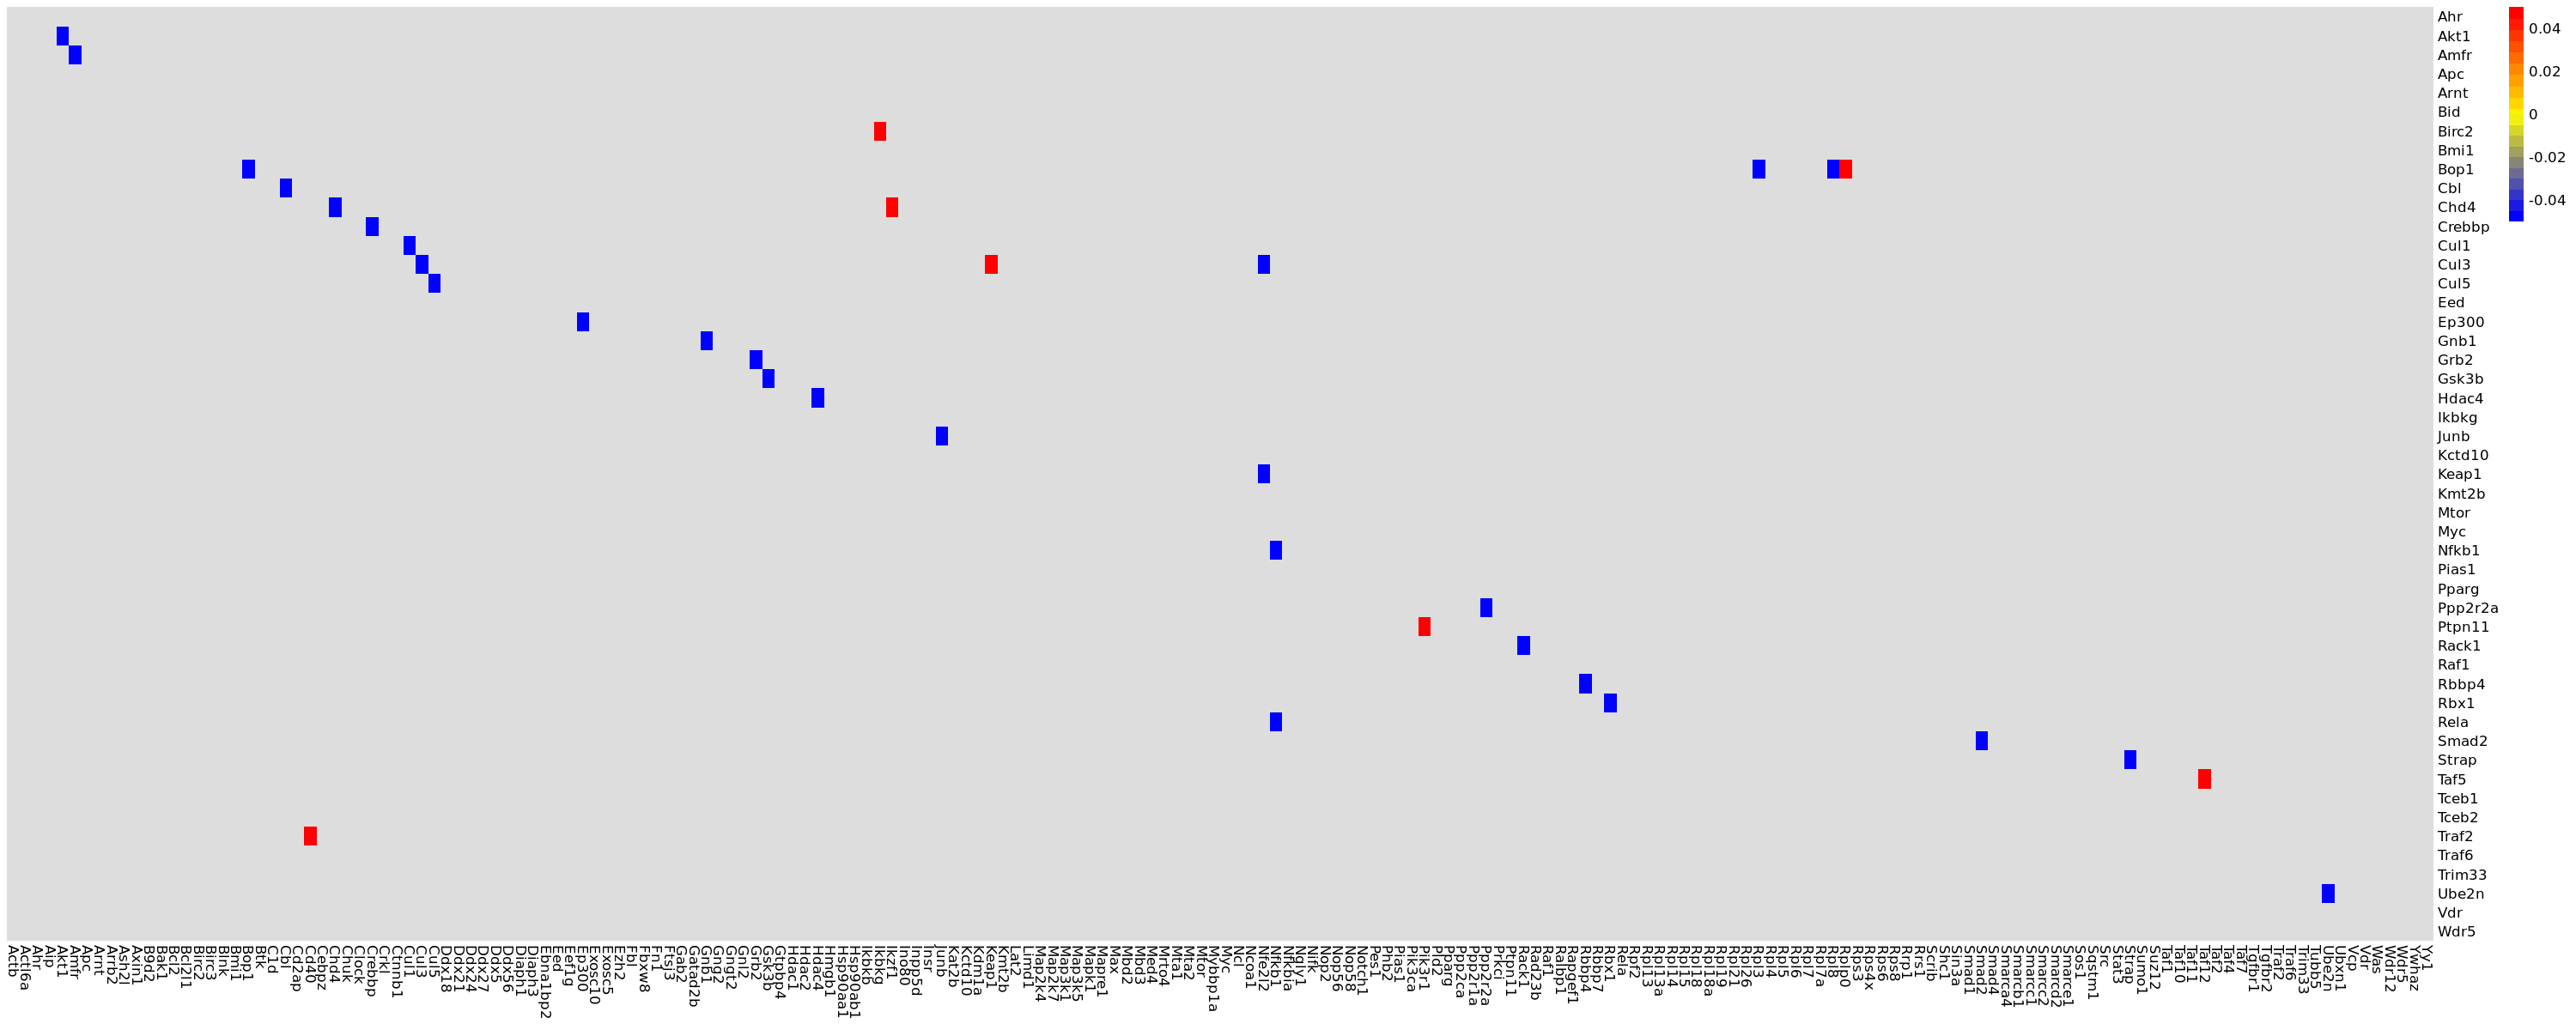

In [34]:
options(repr.plot.width=25, repr.plot.height=10)
pheatmap(myResMat, clustering_method="ward.D2", treeheight_col = 0, treeheight_row = 0, cluster_rows = FALSE, cluster_cols = FALSE, color=myColor, breaks=myBreaks)

In [35]:
summary(myResMat)

   Actb          Actl6a          Ahr            Aip               Akt1      
 Mode:logical   Mode:logical   Mode:logical   Mode:logical   Min.   :-0.05  
 NA's:49        NA's:49        NA's:49        NA's:49        1st Qu.:-0.05  
                                                             Median :-0.05  
                                                             Mean   :-0.05  
                                                             3rd Qu.:-0.05  
                                                             Max.   :-0.05  
                                                             NA's   :48     
      Amfr         Apc            Arnt          Arrb2          Ash2l        
 Min.   :-0.05   Mode:logical   Mode:logical   Mode:logical   Mode:logical  
 1st Qu.:-0.05   NA's:49        NA's:49        NA's:49        NA's:49       
 Median :-0.05                                                              
 Mean   :-0.05                                                              

In [36]:
max(myResMat, na.rm = T)

[1] 0.05

In [37]:
length(which(myResMat > 0))

[1] 7

In [38]:
KOGuide %in% proCompMembers

[1] FALSE

In [39]:
guideModulesN <- data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv"),  row.names = 1, stringsAsFactors = F)
guideModulesN$GuideName  <- as.character(guideModulesN$GuideName )
rownames(guideModulesN) <- guideModulesN$GuideName 
guideModulesN$GuideColor <- NULL

In [40]:
unique(guideModulesN$GuideGroup)

[1] 4 0 1 5 3 2

In [41]:
str(guideModulesN)

'data.frame':	329 obs. of  2 variables:
 $ GuideName : chr  "Aamp" "Bop1" "Cirh1a" "Dcaf13" ...
 $ GuideGroup: int  4 4 4 4 4 4 4 4 4 4 ...


In [42]:
availComplex = sapply(ProteinComplexes, function(x){length(x[(x %in% guideModulesN$GuideName)])})
proCompAvail = ProteinComplexes[which(availComplex > 1)]

In [43]:
uniqueProteinComp = unique(unlist(proCompAvail))

In [44]:
availKOGenes = guideModulesN$GuideName %in% uniqueProteinComp

In [45]:
guideModulesN$GuideName[availKOGenes]

[1] "Grb2"    "Ptpn11"  "Wdr5"    "Ahr"     "Hdac4"   "Ikbkg"   "Kmt2b"  
 [8] "Ube2n"   "Akt1"    "Birc2"   "Chd4"    "Crebbp"  "Ep300"   "Gnb1"   
[15] "Ppp2r2a" "Rbbp4"   "Smad2"   "Traf2"   "Nfkb1"   "Arnt"    "Cbl"    
[22] "Cul1"    "Cul3"    "Cul5"    "Keap1"   "Rbx1"    "Rela"    "Tceb1"  
[29] "Tceb2"   "Trim33"

In [46]:
myResMat = data.frame(matrix(-1, ncol = length(guideModulesN$GuideName[availKOGenes]),nrow = length(proCompAvail)))
colnames(myResMat) = guideModulesN$GuideName[availKOGenes]
rownames(myResMat) = names(proCompAvail)

In [47]:
for(i in 1:nrow(guideModulesN)){
    for(j in 1:length(proCompAvail)){
        proComplex = names(proCompAvail)[j]
        guideName = as.character(guideModulesN[i, "GuideName"])
        
        guideGroup = as.numeric(as.character(guideModulesN[i, "GuideGroup"]))
        
        proCompGenes = proCompAvail[[j]]
        
        
        if(guideName %in% proCompGenes){
            myResMat[proComplex,guideName] = guideGroup
        }
        
    }
}

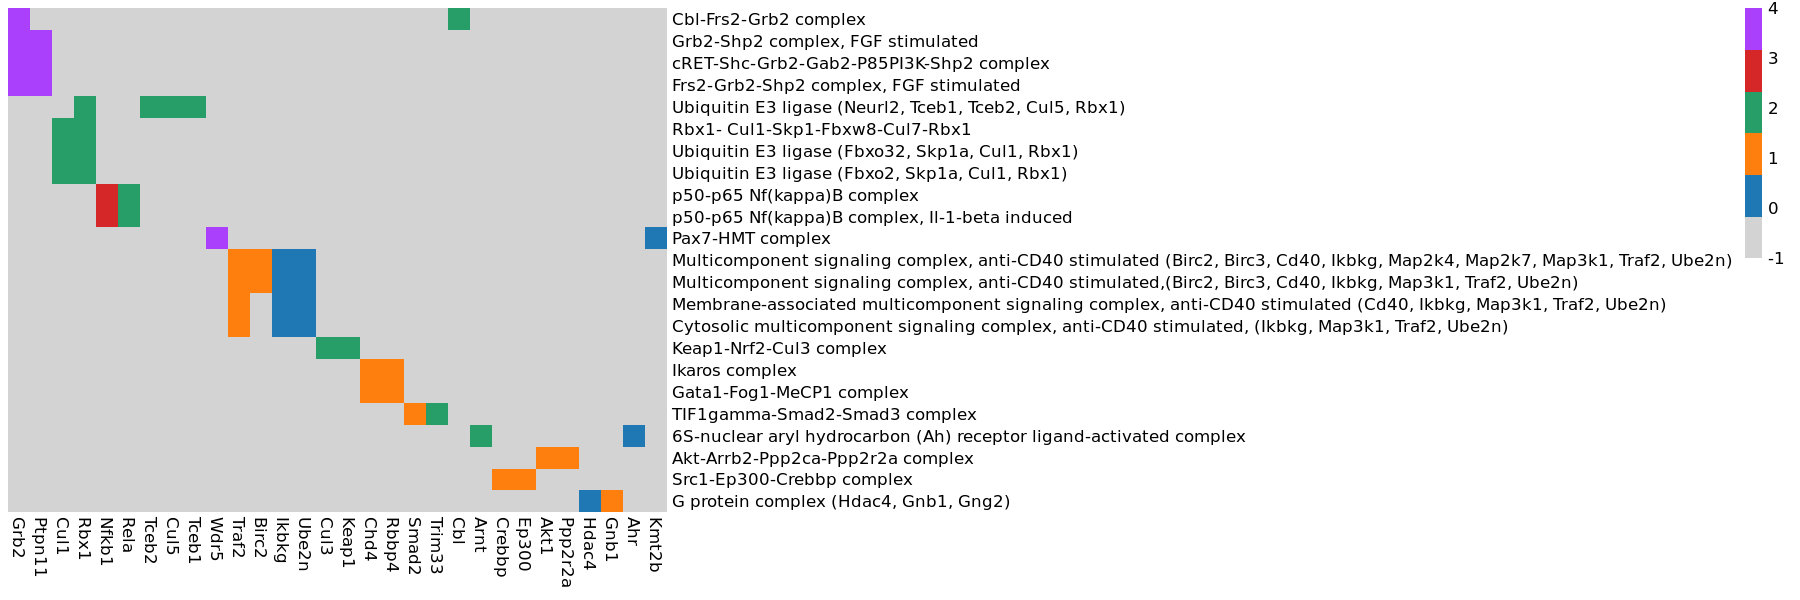

In [48]:
options(repr.plot.width=15, repr.plot.height=5)
pheatmap(myResMat, clustering_method="ward.D2", treeheight_col = 0, treeheight_row = 0, color = c("lightgrey", "#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc"))

In [ ]:
KOEffectedGenes[KOEffectedGenes %ni% ProCompGenes]

In [ ]:
length(ProCompGenes[ProCompGenes %ni% KOEffectedGenes])

In [ ]:
unique(c(KOEffectedGenes, ProCompGenes))

In [ ]:
length(universe[universe %ni% unique(c(KOEffectedGenes, ProCompGenes))])